In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import scipy.signal as sc
import scipy.stats as stats

In [2]:
import sys
sys.path.insert(0, r'C:/Users/Angie Michaiel/Documents/GitHub/FreelyMovingEphys')
from util.paths import find
from project_analysis.ephys.ephys_utils import load_ephys
from project_analysis.doi.doi_utils import doi_saline_label
from project_analysis.doi.doi_utils import pre_post_label
from project_analysis.doi.doi_utils import label_doi_conditions

In [3]:
# load data from days of recordings 
data_path = r'\\kraken\Z\freely_moving_ephys'
dates = ['021621','021721']
data = load_ephys(data_path,dates)


In [4]:
#Dictonary of conditions
conditions = {}
conditions['doi_saline'] = {'doi_dates':['021621'],'saline_dates':['021721']}
conditions['pre_post'] = {'pre_dates':[],'post_dates':['021721']}
conditions_df = label_doi_conditions(data,conditions)

In [5]:
pd.set_option('display.max_rows', None)
conditions_df.dtypes

Amplitude                                                 float64
ContamPct                                                 float64
KSLabel                                                    object
amp                                                       float64
ch                                                          int64
depth                                                       int64
fr                                                        float64
group                                                      object
fm1_n_spikes                                                int64
sh                                                          int64
waveform                                                   object
fm1_spikeT                                                 object
t0                                                        float64
fm1_spikeTraw                                              object
fm1_rate                                                   object
fm1_c_rang

In [7]:
# load data from days of recordings 
data_path = r'\\Niell-v2-w7\t\freely_moving_ephys\ephys_recordings'
dates = ['021621','021721']
data = load_ephys(data_path,dates)



In [8]:
#Dictonary of conditions
conditions = {}
conditions['doi_saline'] = {'doi_dates':['021721'],'saline_dates':['021621']}
conditions['pre_post'] = {'pre_dates':['021621'],'post_dates':[]}
conditions_df1 = label_doi_conditions(data,conditions)

In [9]:
pd.set_option('display.max_rows', None)
conditions_df1.dtypes

Amplitude                                                 float64
ContamPct                                                 float64
KSLabel                                                    object
amp                                                       float64
ch                                                          int64
depth                                                       int64
fr                                                        float64
group                                                      object
fm1_n_spikes                                                int64
sh                                                          int64
waveform                                                   object
fm1_spikeT                                                 object
t0                                                        float64
fm1_spikeTraw                                              object
fm1_rate                                                   object
fm1_c_rang

In [10]:
s1 = conditions_df
s2 = conditions_df1
exp_df=pd.concat([s1, s2])

exp_df = exp_df.loc[exp_df['ContamPct']<=50.0]

In [11]:
#Add column of Total time of recordings as total seconds 
exp_df['Tsec_fm1'] = exp_df['fm1_spikeTraw'].str[-1]
exp_df['Tsec_fm2'] = exp_df['fm2_spikeTraw'].str[-1]
exp_df['Tsec_hf1'] = exp_df['hf1_wn_spikeT'].str[-1]
exp_df['Tsec_hf8'] = exp_df['hf8_wn_spikeTraw'].str[-1]
exp_df['Tsec_hf3'] = exp_df['hf3_gratings_spikeTraw'].str[-1]
exp_df['Tsec_hf6'] = exp_df['hf6_gratings_spikeTraw'].str[-1]



# Make colums for nspikes per recording
exp_df['Tspikes_fm1']=exp_df['fm1_spikeT'].apply(len)
exp_df['Tspikes_fm2']=exp_df['fm2_spikeT'].apply(len)
exp_df['Tspikes_hf1']=exp_df['hf1_wn_spikeT'].apply(len)
exp_df['Tspikes_hf8']=exp_df['hf8_wn_spikeT'].apply(len)
exp_df['Tspikes_hf3']=exp_df['hf3_gratings_spikeT'].apply(len)
exp_df['Tspikes_hf6']=exp_df['hf6_gratings_spikeT'].apply(len)


#Calculate mean firing rate
exp_df['meanfr_fm1'] = exp_df['Tspikes_fm1']/exp_df['Tsec_fm1']
exp_df['meanfr_fm2'] = exp_df['Tspikes_fm2']/exp_df['Tsec_fm2']
exp_df['meanfr_hf1'] = exp_df['Tspikes_hf1']/exp_df['Tsec_hf1']
exp_df['meanfr_hf8'] = exp_df['Tspikes_hf8']/exp_df['Tsec_hf8']
exp_df['meanfr_hf3'] = exp_df['Tspikes_hf3']/exp_df['Tsec_hf3']
exp_df['meanfr_hf6'] = exp_df['Tspikes_hf6']/exp_df['Tsec_hf6']

In [12]:
#df of saline and doi
doi_df=exp_df.loc[exp_df['hf7_sprasenoiseflashdoi/saline']=='doi']
saline_df=exp_df.loc[exp_df['hf7_sprasenoiseflashdoi/saline']=='saline']

C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


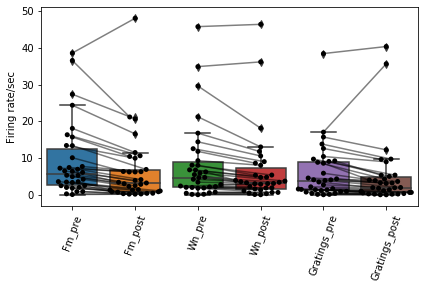

In [13]:
#plot doi fr  
fig, ax = plt.subplots()
frdoi = sns.swarmplot(data=doi_df[doi_df.columns[-6:]],ax=ax,color='black')
frdoi = sns.boxplot(hue = None, data=doi_df[doi_df.columns[-6:]])
plt.xticks(rotation=70)
plt.ylabel('Firing rate/sec')
plt.tight_layout()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Fm_pre'
labels[1] = 'Fm_post'
labels[2] = 'Wn_pre'
labels[3] = 'Wn_post'
labels[4] = 'Gratings_pre'
labels[5] = 'Gratings_post'

ax.set_xticklabels(labels)
#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

for i in range(locs5.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

plt.savefig('DOI_frrate')


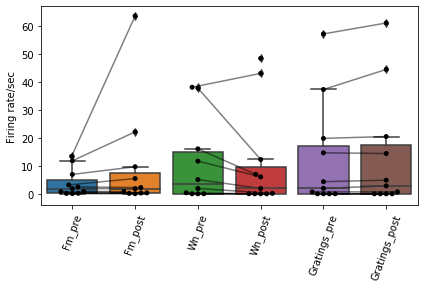

In [14]:
#plot saline fr  
fig, ax = plt.subplots()
frsaline = sns.swarmplot(data=saline_df[saline_df.columns[-6:]],ax=ax,color='black') 
frsaline = sns.boxplot(data=saline_df[saline_df.columns[-6:]])
plt.xticks(rotation=70)
plt.ylabel('Firing rate/sec')
plt.tight_layout()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Fm_pre'
labels[1] = 'Fm_post'
labels[2] = 'Wn_pre'
labels[3] = 'Wn_post'
labels[4] = 'Gratings_pre'
labels[5] = 'Gratings_post'
ax.set_xticklabels(labels)

#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

for i in range(locs5.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

plt.savefig('saline_frrate')


In [15]:
doi_df = doi_df.loc[doi_df['KSLabel']=='good']
doi_df = doi_df.loc[doi_df['fr']>=1.00]
doi_df=doi_df.drop([81,67,76])

saline_df = saline_df.loc[saline_df['KSLabel']=='good']
saline_df = saline_df.loc[saline_df['fr']>=1.00]

In [16]:
#grating psth analysis doi 
# Create psth_df for doi  
doi_df['maxpsth_hf3']=doi_df['hf3_gratings_grating_psth'].apply(max)
doi_df['maxpsth_hf6']=doi_df['hf6_gratings_grating_psth'].apply(max)
doi_df['maxpsth']=doi_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthdoi_df=doi_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]

#Calculate normalized psth
psthdoi_df['normalizedpsth_pre']=psthdoi_df['hf3_gratings_grating_psth']/psthdoi_df['maxpsth']
psthdoi_df['normalizedpsth_post']=psthdoi_df['hf6_gratings_grating_psth']/psthdoi_df['maxpsth']

#Calculate meanpsth
psthdoi_df['meanpsth_pre']=psthdoi_df['normalizedpsth_pre'].apply(np.mean)
psthdoi_df['meanpsth_post']=psthdoi_df['normalizedpsth_post'].apply(np.mean)


C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

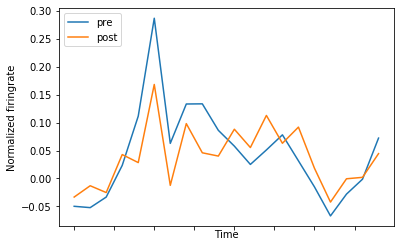

In [17]:
psthpre_acrosscell=psthdoi_df['normalizedpsth_pre'].mean()
psthpost_acrosscell=psthdoi_df['normalizedpsth_post'].mean()
pre_baseline = np.mean(psthpre_acrosscell[:5])
post_baseline=np.mean(psthpost_acrosscell[:5])

plt.plot(psthpre_acrosscell-pre_baseline,label='pre')
plt.plot(psthpost_acrosscell-post_baseline,label='post')
plt.legend(loc=2)
plt.ylabel('Normalized firingrate')
plt.tick_params(labelbottom=False)
plt.xlabel('Time')
plt.savefig('doipsth.png')

In [18]:
#grating psth analysis saline 
# Create psth_df for saline  
saline_df['maxpsth_hf3']=saline_df['hf3_gratings_grating_psth'].apply(max)
saline_df['maxpsth_hf6']=saline_df['hf6_gratings_grating_psth'].apply(max)
saline_df['maxpsth']=saline_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthsaline_df=saline_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]


#Calculate normalized psth
psthsaline_df['normalizedpsth_pre']=psthsaline_df['hf3_gratings_grating_psth']/psthsaline_df['maxpsth']
psthsaline_df['normalizedpsth_post']=psthsaline_df['hf6_gratings_grating_psth']/psthsaline_df['maxpsth']

#Calculate meanpsth
psthsaline_df['meanpsth_pre']=psthsaline_df['normalizedpsth_pre'].apply(np.mean)
psthsaline_df['meanpsth_post']=psthsaline_df['normalizedpsth_post'].apply(np.mean)


C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is try

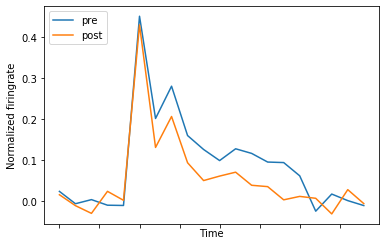

In [19]:
psthpre_acrosscell=psthsaline_df['normalizedpsth_pre'].mean()
psthpost_acrosscell=psthsaline_df['normalizedpsth_post'].mean()
pre_baseline = np.mean(psthpre_acrosscell[:5])
post_baseline=np.mean(psthpost_acrosscell[:5])

plt.plot(psthpre_acrosscell-pre_baseline,label='pre')
plt.plot(psthpost_acrosscell-post_baseline,label='post')
plt.legend(loc=2)
plt.ylabel('Normalized firingrate')
plt.tick_params(labelbottom=False)
plt.xlabel('Time')
plt.savefig('salinepsth.png')

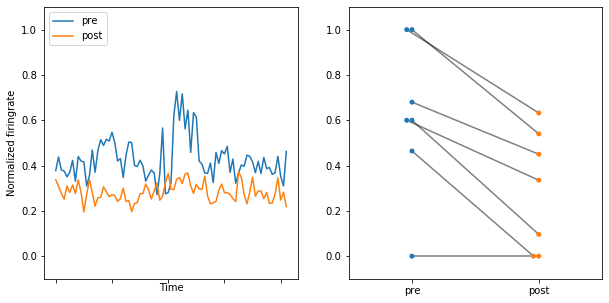

In [20]:
#plot normalize up saccade trace pre post doi 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

doi_df['pre_max_gratings_upsacc_avg']=doi_df['hf3_gratings_upsacc_avg'].apply(max)
doi_df['post_max_gratings_upsacc_avg']=doi_df['hf6_gratings_upsacc_avg'].apply(max)
doi_df['max_gratings_upsacc_avg']=doi_df[['pre_max_gratings_upsacc_avg','post_max_gratings_upsacc_avg']].max(axis=1)
doi_df['normalized_gratings_upsacc_avg_pre']=doi_df['hf3_gratings_upsacc_avg']/doi_df['max_gratings_upsacc_avg']
doi_df['normalized_gratings_upsacc_avg_post']=doi_df['hf6_gratings_upsacc_avg']/doi_df['max_gratings_upsacc_avg']

pre=doi_df['normalized_gratings_upsacc_avg_pre'].mean()
post=doi_df['normalized_gratings_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
doi_df['center_gratings_up_sacc_pre'] = doi_df['normalized_gratings_upsacc_avg_pre'].str[42]
doi_df['center_grating_up_sacc_post'] = doi_df['normalized_gratings_upsacc_avg_post'].str[42]
sns.swarmplot(data=doi_df[doi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)



plt.savefig('doi_upsacc_gratings')


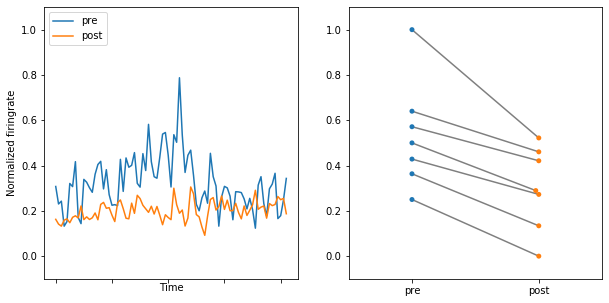

In [21]:
#plot normalize down saccade trace pre post doi 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

doi_df['pre_max_gratings_downsacc_avg']=doi_df['hf3_gratings_downsacc_avg'].apply(max)
doi_df['post_max_gratings_downsacc_avg']=doi_df['hf6_gratings_downsacc_avg'].apply(max)
doi_df['max_gratings_downsacc_avg']=doi_df[['pre_max_gratings_downsacc_avg','post_max_gratings_downsacc_avg']].max(axis=1)
doi_df['normalized_gratings_downsacc_avg_pre']=doi_df['hf3_gratings_downsacc_avg']/doi_df['max_gratings_downsacc_avg']
doi_df['normalized_gratings_downsacc_avg_post']=doi_df['hf6_gratings_downsacc_avg']/doi_df['max_gratings_downsacc_avg']

pre=doi_df['normalized_gratings_downsacc_avg_pre'].mean()
post=doi_df['normalized_gratings_downsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
doi_df['center_gratings_down_sacc_pre'] = doi_df['normalized_gratings_downsacc_avg_pre'].str[42]
doi_df['center_gratings_down_sacc_post'] = doi_df['normalized_gratings_downsacc_avg_post'].str[42]
sns.swarmplot(data=doi_df[doi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)

plt.savefig('doi_downsacc_gratings')


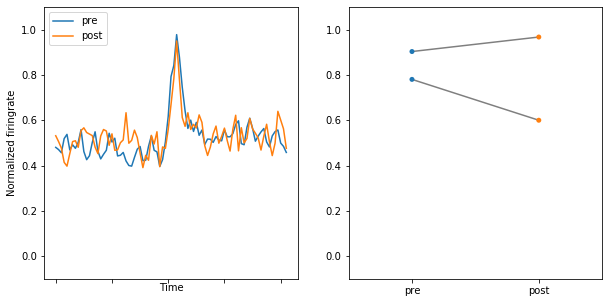

In [22]:
#plot normalize up saccade trace pre post saline 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_gratings_upsacc_avg']=saline_df['hf3_gratings_upsacc_avg'].apply(max)
saline_df['post_max_gratings_upsacc_avg']=saline_df['hf6_gratings_upsacc_avg'].apply(max)
saline_df['max_gratings_upsacc_avg']=saline_df[['pre_max_gratings_upsacc_avg','post_max_gratings_upsacc_avg']].max(axis=1)
saline_df['normalized_gratings_upsacc_avg_pre']=saline_df['hf3_gratings_upsacc_avg']/saline_df['max_gratings_upsacc_avg']
saline_df['normalized_gratings_upsacc_avg_post']=saline_df['hf6_gratings_upsacc_avg']/saline_df['max_gratings_upsacc_avg']

pre=saline_df['normalized_gratings_upsacc_avg_pre'].mean()
post=saline_df['normalized_gratings_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')


ax = axs[1]

saline_df['center_gratings_up_sacc_pre'] = saline_df['normalized_gratings_upsacc_avg_pre'].str[42]
saline_df['center_grating_up_sacc_post'] = saline_df['normalized_gratings_upsacc_avg_post'].str[42]
sns.swarmplot(data=saline_df[saline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)


       
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('saline_upsacc_gratings')


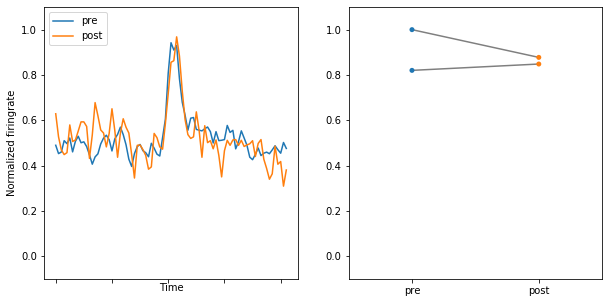

In [23]:
#plot normalize down saccade trace pre post saline 
ig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_gratings_downsacc_avg']=saline_df['hf3_gratings_downsacc_avg'].apply(max)
saline_df['post_max_gratings_downsacc_avg']=saline_df['hf6_gratings_downsacc_avg'].apply(max)
saline_df['max_gratings_downsacc_avg']=saline_df[['pre_max_gratings_downsacc_avg','post_max_gratings_downsacc_avg']].max(axis=1)
saline_df['normalized_gratings_downsacc_avg_pre']=saline_df['hf3_gratings_downsacc_avg']/saline_df['max_gratings_downsacc_avg']
saline_df['normalized_gratings_downsacc_avg_post']=saline_df['hf6_gratings_downsacc_avg']/saline_df['max_gratings_downsacc_avg']

pre=saline_df['normalized_gratings_downsacc_avg_pre'].mean()
post=saline_df['normalized_gratings_downsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]

saline_df['center_gratings_down_sacc_pre'] = saline_df['normalized_gratings_downsacc_avg_pre'].str[42]
saline_df['center_grating_down_sacc_post'] = saline_df['normalized_gratings_downsacc_avg_post'].str[42]
sns.swarmplot(data=saline_df[saline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)


       
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('saline_downsacc_gratings')

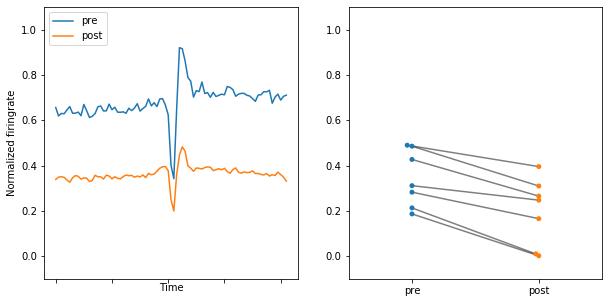

In [24]:
#plot normalize up saccade trace pre post fm doi
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

doi_df['pre_max_fm_upsacc_avg']=doi_df['fm1_upsacc_avg'].apply(max)
doi_df['post_max_fm_upsacc_avg']=doi_df['fm2_upsacc_avg'].apply(max)
doi_df['max_fm_upsacc_avg']=doi_df[['pre_max_fm_upsacc_avg','post_max_fm_upsacc_avg']].max(axis=1)
doi_df['normalized_fm_upsacc_avg_pre']=doi_df['fm1_upsacc_avg']/doi_df['max_fm_upsacc_avg']
doi_df['normalized_fm_upsacc_avg_post']=doi_df['fm2_upsacc_avg']/doi_df['max_fm_upsacc_avg']

pre=doi_df['normalized_fm_upsacc_avg_pre'].mean()
post=doi_df['normalized_fm_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
doi_df['center_fm_up_sacc_pre'] = doi_df['normalized_fm_upsacc_avg_pre'].str[42]
doi_df['center_fm_up_sacc_post'] = doi_df['normalized_fm_upsacc_avg_post'].str[42]
sns.swarmplot(data=doi_df[doi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('doi_upsacc_fm')

(-0.1, 1.1)

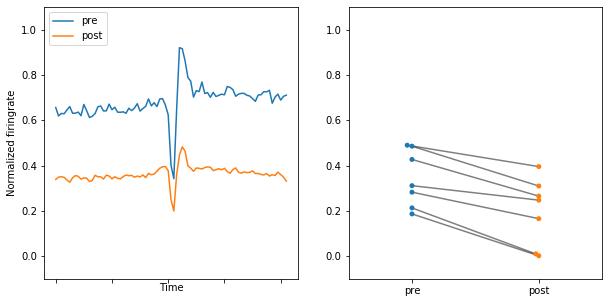

In [25]:
#plot normalize up saccade trace pre post fm doi
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

doi_df['pre_max_fm_upsacc_avg']=doi_df['fm1_upsacc_avg'].apply(max)
doi_df['post_max_fm_upsacc_avg']=doi_df['fm2_upsacc_avg'].apply(max)
doi_df['max_fm_upsacc_avg']=doi_df[['pre_max_fm_upsacc_avg','post_max_fm_upsacc_avg']].max(axis=1)
doi_df['normalized_fm_upsacc_avg_pre']=doi_df['fm1_upsacc_avg']/doi_df['max_fm_upsacc_avg']
doi_df['normalized_fm_upsacc_avg_post']=doi_df['fm2_upsacc_avg']/doi_df['max_fm_upsacc_avg']

pre=doi_df['normalized_fm_upsacc_avg_pre'].mean()
post=doi_df['normalized_fm_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
doi_df['center_fm_up_sacc_pre'] = doi_df['normalized_fm_upsacc_avg_pre'].str[42]
doi_df['center_fm_up_sacc_post'] = doi_df['normalized_fm_upsacc_avg_post'].str[42]
sns.swarmplot(data=doi_df[doi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
#plt.savefig('doi_upsacc_fm')

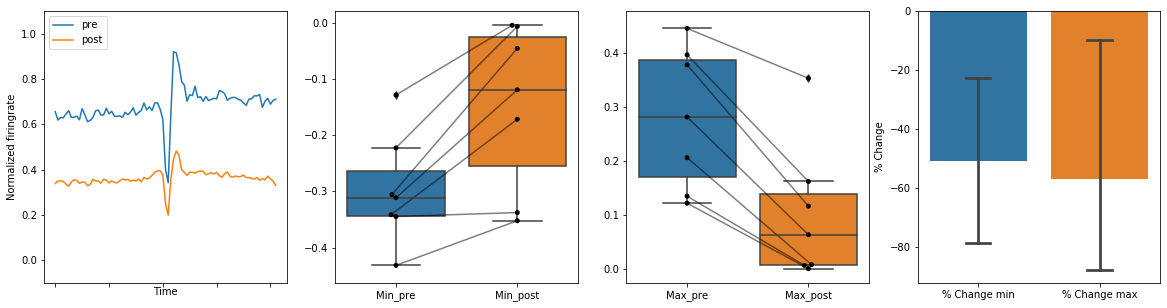

In [38]:
#plot normalize up saccade trace pre post fm doi
# Figure 4 plots
fig, axs = plt.subplots(1,4,figsize=(20,5))
axs = axs.ravel()
ax = axs[0]

#Normalize sacc ptsh
doi_df['pre_max_fm_upsacc_avg']=doi_df['fm1_upsacc_avg'].apply(max)
doi_df['post_max_fm_upsacc_avg']=doi_df['fm2_upsacc_avg'].apply(max)
doi_df['max_fm_upsacc_avg']=doi_df[['pre_max_fm_upsacc_avg','post_max_fm_upsacc_avg']].max(axis=1)
doi_df['normalized_fm_upsacc_avg_pre']=doi_df['fm1_upsacc_avg']/doi_df['max_fm_upsacc_avg']
doi_df['normalized_fm_upsacc_avg_post']=doi_df['fm2_upsacc_avg']/doi_df['max_fm_upsacc_avg']

pre=doi_df['normalized_fm_upsacc_avg_pre'].mean()
post=doi_df['normalized_fm_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
#Find min peaks normalized by baseline firing rate


pre_baseline  = doi_df['normalized_fm_upsacc_avg_pre'].str[:20].apply(np.mean)
post_baseline   = doi_df['normalized_fm_upsacc_avg_post'].str[:20].apply(np.mean)
# plot pre post min 
ax = axs[1]
min_normalized_fm_upsacc_avg_pre=doi_df['normalized_fm_upsacc_avg_pre'].apply(min)
min_normalized_fm_upsacc_avg_post=doi_df['normalized_fm_upsacc_avg_post'].apply(min)

doi_df['min_normalized_upsacc_pre'] = min_normalized_fm_upsacc_avg_pre-pre_baseline
doi_df['min_normalized_upsacc_post'] = min_normalized_fm_upsacc_avg_post-post_baseline

sns.swarmplot(data=doi_df[['min_normalized_upsacc_pre','min_normalized_upsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=doi_df[['min_normalized_upsacc_pre','min_normalized_upsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Min_pre'
labels[1] = 'Min_post'
ax.set_xticklabels(labels)

ax = axs[2]
#Find max peaks normalized by baseline firing rate
max_normalized_fm_upsacc_avg_pre=doi_df['normalized_fm_upsacc_avg_pre'].str[44]
max_normalized_fm_upsacc_avg_post=doi_df['normalized_fm_upsacc_avg_post'].str[44]
doi_df['max_normalized_upsacc_pre'] = max_normalized_fm_upsacc_avg_pre-pre_baseline
doi_df['max_normalized_upsacc_post'] = max_normalized_fm_upsacc_avg_post-post_baseline

sns.swarmplot(data=doi_df[['max_normalized_upsacc_pre','max_normalized_upsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=doi_df[['max_normalized_upsacc_pre','max_normalized_upsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Max_pre'
labels[1] = 'Max_post'
ax.set_xticklabels(labels)

ax = axs[3]

doi_df['per_change_fm_max_upsacc']=(doi_df['max_normalized_upsacc_post']-doi_df['max_normalized_upsacc_pre'])\
/doi_df['max_normalized_upsacc_pre'] *100

doi_df['per_change_fm_min_upsacc']=(doi_df['min_normalized_upsacc_post']-doi_df['min_normalized_upsacc_pre'])\
/doi_df['min_normalized_upsacc_pre'] *100

sns.barplot(data = doi_df[['per_change_fm_min','per_change_fm_max']], capsize = .2,ax=ax)
ax.set_ylabel('% Change')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '% Change min'
labels[1] =  '% Change max'
ax.set_xticklabels(labels)
 



plt.savefig('DOI_fm_upsacc')


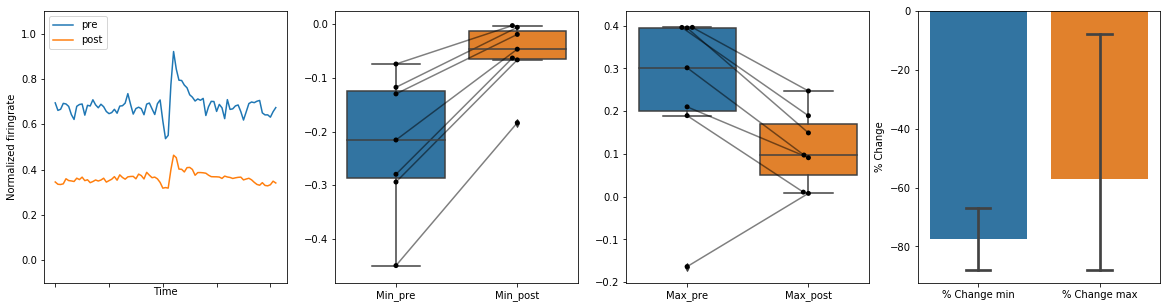

In [40]:
#plot normalize down saccade trace pre post fm doi
# Figure 4 plots
fig, axs = plt.subplots(1,4,figsize=(20,5))
axs = axs.ravel()
ax = axs[0]

#Normalize sacc ptsh
doi_df['pre_max_fm_downsacc_avg']=doi_df['fm1_downsacc_avg'].apply(max)
doi_df['post_max_fm_downsacc_avg']=doi_df['fm2_downsacc_avg'].apply(max)
doi_df['max_fm_downsacc_avg']=doi_df[['pre_max_fm_downsacc_avg','post_max_fm_downsacc_avg']].max(axis=1)
doi_df['normalized_fm_downsacc_avg_pre']=doi_df['fm1_downsacc_avg']/doi_df['max_fm_downsacc_avg']
doi_df['normalized_fm_downsacc_avg_post']=doi_df['fm2_downsacc_avg']/doi_df['max_fm_downsacc_avg']

pre=doi_df['normalized_fm_downsacc_avg_pre'].mean()
post=doi_df['normalized_fm_downsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
#Find min peaks normalized by baseline firing rate


pre_baseline  = doi_df['normalized_fm_downsacc_avg_pre'].str[:20].apply(np.mean)
post_baseline   = doi_df['normalized_fm_downsacc_avg_post'].str[:20].apply(np.mean)
# plot pre post min 
ax = axs[1]
min_normalized_fm_downsacc_avg_pre=doi_df['normalized_fm_downsacc_avg_pre'].apply(min)
min_normalized_fm_downsacc_avg_post=doi_df['normalized_fm_downsacc_avg_post'].apply(min)

doi_df['min_normalized_downsacc_pre'] = min_normalized_fm_downsacc_avg_pre-pre_baseline
doi_df['min_normalized_downsacc_post'] = min_normalized_fm_downsacc_avg_post-post_baseline

sns.swarmplot(data=doi_df[['min_normalized_downsacc_pre','min_normalized_downsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=doi_df[['min_normalized_downsacc_pre','min_normalized_downsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Min_pre'
labels[1] = 'Min_post'
ax.set_xticklabels(labels)

ax = axs[2]
#Find max peaks normalized by baseline firing rate
max_normalized_fm_downsacc_avg_pre=doi_df['normalized_fm_downsacc_avg_pre'].str[44]
max_normalized_fm_downsacc_avg_post=doi_df['normalized_fm_downsacc_avg_post'].str[44]
doi_df['max_normalized_downsacc_pre'] = max_normalized_fm_downsacc_avg_pre-pre_baseline
doi_df['max_normalized_downsacc_post'] = max_normalized_fm_downsacc_avg_post-post_baseline

sns.swarmplot(data=doi_df[['max_normalized_downsacc_pre','max_normalized_downsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=doi_df[['max_normalized_downsacc_pre','max_normalized_downsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Max_pre'
labels[1] = 'Max_post'
ax.set_xticklabels(labels)

ax = axs[3]

doi_df['per_change_fm_max_donwsacc']=(doi_df['max_normalized_downsacc_post']-doi_df['max_normalized_downsacc_pre'])\
/doi_df['max_normalized_upsacc_pre'] *100

doi_df['per_change_fm_min_downsacc']=(doi_df['min_normalized_downsacc_post']-doi_df['min_normalized_downsacc_pre'])\
/doi_df['min_normalized_downsacc_pre'] *100

sns.barplot(data = doi_df[['per_change_fm_min_downsacc','per_change_fm_max_upsacc']], capsize = .2,ax=ax)
ax.set_ylabel('% Change')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '% Change min'
labels[1] =  '% Change max'
ax.set_xticklabels(labels)




plt.savefig('DOI_fm_downsacc')

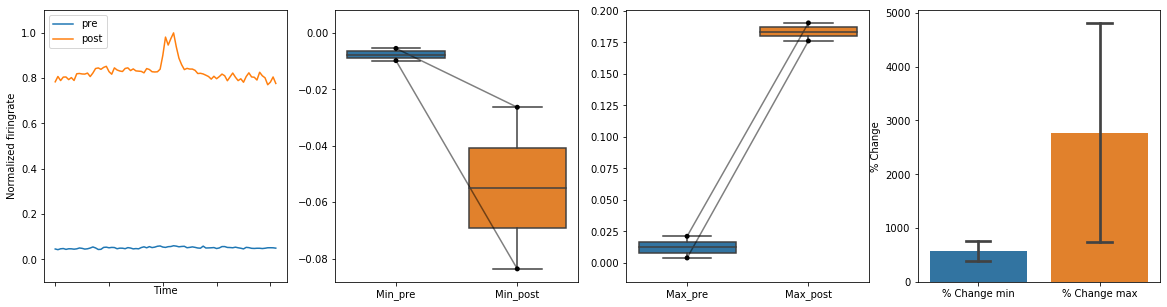

In [42]:
#plot normalize up saccade trace pre post fm salsaline
fig, axs = plt.subplots(1,4,figsize=(20,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_fm_upsacc_avg']=saline_df['fm1_upsacc_avg'].apply(max)
saline_df['post_max_fm_upsacc_avg']=saline_df['fm2_upsacc_avg'].apply(max)
saline_df['max_fm_upsacc_avg']=saline_df[['pre_max_fm_upsacc_avg','post_max_fm_upsacc_avg']].max(axis=1)
saline_df['normalized_fm_upsacc_avg_pre']=saline_df['fm1_upsacc_avg']/saline_df['max_fm_upsacc_avg']
saline_df['normalized_fm_upsacc_avg_post']=saline_df['fm2_upsacc_avg']/saline_df['max_fm_upsacc_avg']

pre=saline_df['normalized_fm_upsacc_avg_pre'].mean()
post=saline_df['normalized_fm_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
#Find min peaks normalized by baseline firing rate


pre_baseline  = saline_df['normalized_fm_upsacc_avg_pre'].str[:20].apply(np.mean)
post_baseline   = saline_df['normalized_fm_upsacc_avg_post'].str[:20].apply(np.mean)
# plot pre post min 
ax = axs[1]
min_normalized_fm_upsacc_avg_pre=saline_df['normalized_fm_upsacc_avg_pre'].apply(min)
min_normalized_fm_upsacc_avg_post=saline_df['normalized_fm_upsacc_avg_post'].apply(min)

saline_df['min_normalized_upsacc_pre'] = min_normalized_fm_upsacc_avg_pre-pre_baseline
saline_df['min_normalized_upsacc_post'] = min_normalized_fm_upsacc_avg_post-post_baseline

sns.swarmplot(data=saline_df[['min_normalized_upsacc_pre','min_normalized_upsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=saline_df[['min_normalized_upsacc_pre','min_normalized_upsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Min_pre'
labels[1] = 'Min_post'
ax.set_xticklabels(labels)

ax = axs[2]
#Find max peaks normalized by baseline firing rate
max_normalized_fm_upsacc_avg_pre=saline_df['normalized_fm_upsacc_avg_pre'].str[44]
max_normalized_fm_upsacc_avg_post=saline_df['normalized_fm_upsacc_avg_post'].str[44]
saline_df['max_normalized_upsacc_pre'] = max_normalized_fm_upsacc_avg_pre-pre_baseline
saline_df['max_normalized_upsacc_post'] = max_normalized_fm_upsacc_avg_post-post_baseline

sns.swarmplot(data=saline_df[['max_normalized_upsacc_pre','max_normalized_upsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=saline_df[['max_normalized_upsacc_pre','max_normalized_upsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Max_pre'
labels[1] = 'Max_post'
ax.set_xticklabels(labels)

ax = axs[3]
saline_df['per_change_fm_max']=(saline_df['max_normalized_upsacc_post']-saline_df['max_normalized_upsacc_pre'])\
/saline_df['max_normalized_upsacc_pre'] *100

saline_df['per_change_fm_min']=(saline_df['min_normalized_upsacc_post']-saline_df['min_normalized_upsacc_pre'])\
/saline_df['min_normalized_upsacc_pre'] *100

sns.barplot(data = saline_df[['per_change_fm_min','per_change_fm_max']], capsize = .2,ax=ax)
ax.set_ylabel('% Change')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '% Change min'
labels[1] =  '% Change max'
ax.set_xticklabels(labels)
 




plt.savefig('saline_fm_upsacc')

In [28]:
min_normalized_fm_upsacc_avg_pre-pre_baseline*100



55   -2.243275
56   -7.101360
Name: normalized_fm_upsacc_avg_pre, dtype: float64

<BarContainer object of 2 artists>

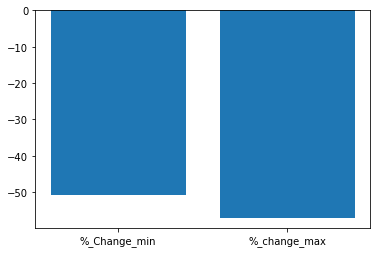

In [29]:
plt.bar(['%_Change_min','%_change_max'],[doi_df['per_change_fm_min'].mean(),doi_df['per_change_fm_max'].mean()])

In [30]:
min_normalized_fm_upsacc_avg_post-post_baseline

55   -0.026365
56   -0.083674
Name: normalized_fm_upsacc_avg_post, dtype: float64

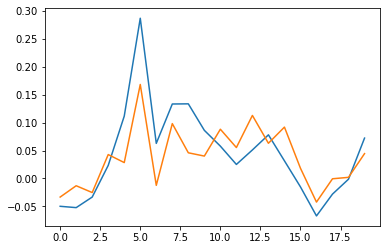

In [31]:
psthpre_acrosscell=psthdoi_df['normalizedpsth_pre'].mean()
psthpost_acrosscell=psthdoi_df['normalizedpsth_post'].mean()
pre_baseline = np.mean(psthpre_acrosscell[:5])
post_baseline=np.mean(psthpost_acrosscell[:5])

plt.plot(psthpre_acrosscell-pre_baseline,label='pre')
plt.plot(psthpost_acrosscell-post_baseline,label='post')


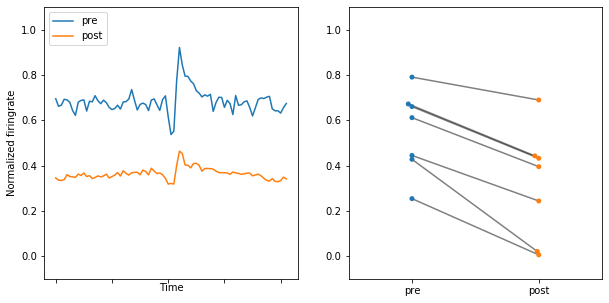

In [32]:
#plot normalize down saccade trace pre post fm doi 
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

doi_df['pre_max_fm_downsacc_avg']=doi_df['fm1_downsacc_avg'].apply(max)
doi_df['post_max_fm_downsacc_avg']=doi_df['fm2_downsacc_avg'].apply(max)
doi_df['max_fm_downsacc_avg']=doi_df[['pre_max_fm_downsacc_avg','post_max_fm_downsacc_avg']].max(axis=1)
doi_df['normalized_fm_downsacc_avg_pre']=doi_df['fm1_downsacc_avg']/doi_df['max_fm_downsacc_avg']
doi_df['normalized_fm_downsacc_avg_post']=doi_df['fm2_downsacc_avg']/doi_df['max_fm_downsacc_avg']

pre=doi_df['normalized_fm_downsacc_avg_pre'].mean()
post=doi_df['normalized_fm_downsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
doi_df['center_fm_down_sacc_pre'] = doi_df['normalized_fm_downsacc_avg_pre'].str[42]
doi_df['center_fm_down_sacc_post'] = doi_df['normalized_fm_downsacc_avg_post'].str[42]
sns.swarmplot(data=doi_df[doi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('doi_downsacc_fm')

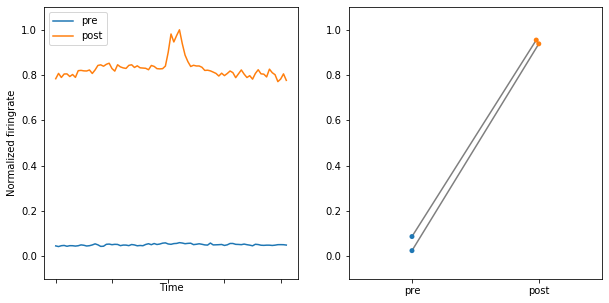

In [33]:
#plot normalize up saccade trace pre post fm saline
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_fm_upsacc_avg']=saline_df['fm1_upsacc_avg'].apply(max)
saline_df['post_max_fm_upsacc_avg']=saline_df['fm2_upsacc_avg'].apply(max)
saline_df['max_fm_upsacc_avg']=saline_df[['pre_max_fm_upsacc_avg','post_max_fm_upsacc_avg']].max(axis=1)
saline_df['normalized_fm_upsacc_avg_pre']=saline_df['fm1_upsacc_avg']/saline_df['max_fm_upsacc_avg']
saline_df['normalized_fm_upsacc_avg_post']=saline_df['fm2_upsacc_avg']/saline_df['max_fm_upsacc_avg']

pre=saline_df['normalized_fm_upsacc_avg_pre'].mean()
post=saline_df['normalized_fm_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
saline_df['center_fm_up_sacc_pre'] = saline_df['normalized_fm_upsacc_avg_pre'].str[42]
saline_df['center_fm_up_sacc_post'] = saline_df['normalized_fm_upsacc_avg_post'].str[42]
sns.swarmplot(data=saline_df[saline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('saline_upsacc_fm')

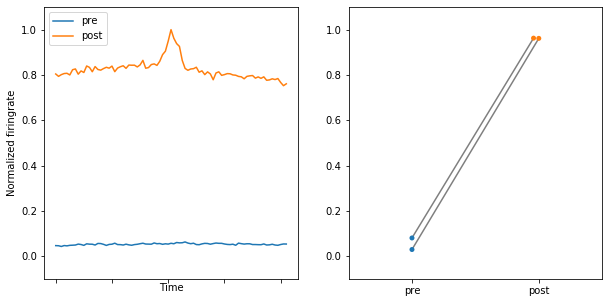

In [34]:
#plot normalize dowm saccade trace pre post fm saline
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_fm_downsacc_avg']=saline_df['fm1_downsacc_avg'].apply(max)
saline_df['post_max_fm_downsacc_avg']=saline_df['fm2_downsacc_avg'].apply(max)
saline_df['max_fm_downsacc_avg']=saline_df[['pre_max_fm_downsacc_avg','post_max_fm_downsacc_avg']].max(axis=1)
saline_df['normalized_fm_downsacc_avg_pre']=saline_df['fm1_downsacc_avg']/saline_df['max_fm_downsacc_avg']
saline_df['normalized_fm_downsacc_avg_post']=saline_df['fm2_downsacc_avg']/saline_df['max_fm_downsacc_avg']

pre=saline_df['normalized_fm_downsacc_avg_pre'].mean()
post=saline_df['normalized_fm_downsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
saline_df['center_fm_down_sacc_pre'] = saline_df['normalized_fm_downsacc_avg_pre'].str[42]
saline_df['center_fm_down_sacc_post'] = saline_df['normalized_fm_downsacc_avg_post'].str[42]
sns.swarmplot(data=saline_df[saline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'pre'
labels[1] = 'post'

ax.set_xticklabels(labels)
ax.set_ylim(-.1,1.1)
plt.savefig('saline_downsacc_fm')

TypeError: unsupported operand type(s) for -: 'method' and 'float'

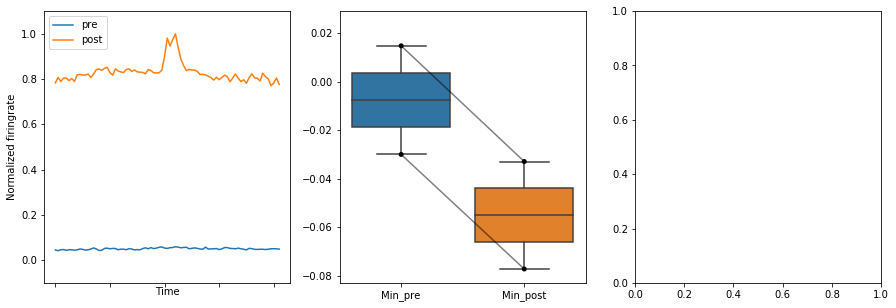

In [35]:
#plot normalize up saccade trace pre post fm saline
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs = axs.ravel()
ax = axs[0]

saline_df['pre_max_fm_upsacc_avg']=saline_df['fm1_upsacc_avg'].apply(max)
saline_df['post_max_fm_upsacc_avg']=saline_df['fm2_upsacc_avg'].apply(max)
saline_df['max_fm_upsacc_avg']=saline_df[['pre_max_fm_upsacc_avg','post_max_fm_upsacc_avg']].max(axis=1)
saline_df['normalized_fm_upsacc_avg_pre']=saline_df['fm1_upsacc_avg']/saline_df['max_fm_upsacc_avg']
saline_df['normalized_fm_upsacc_avg_post']=saline_df['fm2_upsacc_avg']/saline_df['max_fm_upsacc_avg']

pre=saline_df['normalized_fm_upsacc_avg_pre'].mean()
post=saline_df['normalized_fm_upsacc_avg_post'].mean()

ax.plot(pre,label ='pre')
ax.plot(post,label ='post')
ax.legend(loc=2)
ax.set_ylabel('Normalized firingrate')
ax.set_ylim(-.1,1.1)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Time')

ax = axs[1]
#Find min peaks normalized by baseline firing rate

pre_across = saline_df['normalized_fm_upsacc_avg_pre'].mean()
post_across = saline_df['normalized_fm_upsacc_avg_post'].mean()
pre_baseline = np.mean(pre_across[:20])
post_baseline = np.mean(post_across[:20])
                        
min_normalized_fm_upsacc_avg_pre=saline_df['normalized_fm_upsacc_avg_pre'].apply(min)
min_normalized_fm_upsacc_avg_post=saline_df['normalized_fm_upsacc_avg_post'].apply(min)


saline_df['min_normalized_upsacc_pre'] = min_normalized_fm_upsacc_avg_pre-pre_baseline
saline_df['min_normalized_upsacc_post'] = min_normalized_fm_upsacc_avg_post-post_baseline

sns.swarmplot(data=saline_df[['min_normalized_upsacc_pre','min_normalized_upsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=saline_df[['min_normalized_upsacc_pre','min_normalized_upsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Min_pre'
labels[1] = 'Min_post'
ax.set_xticklabels(labels)

ax = axs[2]
#Find max peaks normalized by baseline firing rate
max_normalized_fm_upsacc_avg_pre=saline_df['normalized_fm_upsacc_avg_pre'].apply
max_normalized_fm_upsacc_avg_post=saline_df['normalized_fm_upsacc_avg_post'].apply
saline_df['max_normalized_upsacc_pre'] = max_normalized_fm_upsacc_avg_pre-pre_baseline
saline_df['max_normalized_upsacc_post'] = max_normalized_fm_upsacc_avg_post-post_baseline

sns.swarmplot(data=saline_df[['max_normalized_upsacc_pre','max_normalized_upsacc_post']],ax=ax,color='black')
sns.boxplot(hue = None, data=saline_df[['max_normalized_upsacc_pre','max_normalized_upsacc_post']],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
#Lables for x axis
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Max_pre'
labels[1] = 'Max_post'
ax.set_xticklabels(labels)

plt.savefig('saline_fm_upsacc')


In [ ]:
doi_df['pre_baseline'] = doi_df['normalized_fm_upsacc_avg_pre'].str[:20].apply(np.mean)
doi_df['pre_baseline']

In [ ]:
doi_df['pre_baseline'].apply(np.mean)

In [ ]:
 doi_df['normalized_fm_upsacc_avg_pre']

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax=axs[0]
pre=doi_df['hf1_wn_spike_rate_vs_pupil_radius_tuning'].mean()
post=doi_df['hf8_wn_spike_rate_vs_pupil_radius_tuning'].mean()
ax.plot(pre,label='pre')
ax.plot(post,label='post')
ax.legend(loc=2)
ax.set_ylim(0, 40)
ax.set_ylabel('Firing rate')
ax.set_xlabel('Pupil size')
ax.tick_params(labelbottom=False)
ax=axs[1]
pre=saline_df['hf1_wn_spike_rate_vs_pupil_radius_tuning'].mean()
post=saline_df['hf8_wn_spike_rate_vs_pupil_radius_tuning'].mean()
ax.plot(pre,label='pre')
ax.plot(post,label='post')
ax.set_xlabel('Pupil size')

ax.tick_params(labelbottom=False)

ax.set_ylim(0, 65)
plt.savefig('pupil_wn')

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax=axs[0]
pre=doi_df['hf3_gratings_spike_rate_vs_pupil_radius_tuning'].mean()
post=doi_df['hf6_gratings_spike_rate_vs_pupil_radius_tuning'].mean()
ax.plot(pre,label='pre')
ax.plot(post,label='post')
ax.legend(loc=2)
ax.set_ylabel('Firing rate')
ax.set_ylim(0, 50)
ax.set_xlabel('Pupil size')
ax.tick_params(labelbottom=False)

ax=axs[1]
pre=saline_df['hf3_gratings_spike_rate_vs_pupil_radius_tuning'].mean()
post=saline_df['hf6_gratings_spike_rate_vs_pupil_radius_tuning'].mean()
ax.plot(pre,label='pre')
ax.plot(post,label='post')

ax.set_ylim(0, 75)
ax.set_xlabel('Pupil size')
ax.tick_params(labelbottom=False)
plt.savefig('pupil_grating')

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()
ax=axs[0]
pre=doi_df['fm1_spike_rate_vs_pupil_radius_tuning'].mean()
post=doi_df['fm2_spike_rate_vs_pupil_radius_tuning'].mean()
ax.plot(pre,label='pre')
ax.plot(post,label='post')
ax.legend(loc=2)
ax.set_ylabel('firing rate')
ax.set_ylim(0, 40)
ax.set_xlabel('Pupil size')
ax.tick_params(labelbottom=False)

ax=axs[1]
pre=saline_df['fm1_spike_rate_vs_pupil_radius_tuning'].mean()
post=saline_df['fm2_spike_rate_vs_pupil_radius_tuning'].mean()

ax.plot(pre,label='pre')
ax.plot(post,label='post')
ax.set_ylim(0, 50)
ax.set_xlabel('Pupil size')
ax.tick_params(labelbottom=False)
#plt.savefig('pupil_fm')

In [ ]:
#Contrast response 
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]


contrast_plotpre=doi_df['hf1_wn_contrast_response'].mean()
contrast_plotpost=doi_df['hf8_wn_contrast_response'].mean()
ax.plot(contrast_plotpre,label='pre')
ax.plot(contrast_plotpost,label='post')
ax.set_ylabel('firing rate')
ax.legend()
ax.set_ylim(0, 30)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Contrast')

ax=axs[1]
contrast_plotpre=saline_df['hf1_wn_contrast_response'].mean()
contrast_plotpost=saline_df['hf8_wn_contrast_response'].mean()
ax.plot(contrast_plotpre,label='pre')
ax.plot(contrast_plotpost,label='post')
ax.set_ylim(0, 55)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Contrast')

plt.savefig('wn_contrast')

In [ ]:
#Contrast response grating 1 
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]


contrast_plotpre=doi_df['hf3_gratings_contrast_response'].mean()
contrast_plotpost=doi_df['hf6_gratings_contrast_response'].mean()
ax.plot(contrast_plotpre,label='pre')
ax.plot(contrast_plotpost,label='post')
ax.legend()
ax.set_ylabel('firing rate')
ax.set_ylim(0, 21)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Contrast')

ax=axs[1]
contrast_plotpre=saline_df['hf3_gratings_contrast_response'].mean()
contrast_plotpost=saline_df['hf6_gratings_contrast_response'].mean()
ax.plot(contrast_plotpre,label='pre')
ax.plot(contrast_plotpost,label='post')

ax.set_ylim(0,65)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Contrast')

plt.savefig('gratings_contrast')

In [ ]:
#Contrast response fm
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]


contrast_plotpre=doi_df['fm1_contrast_response'].mean()
contrast_plotpost=doi_df['fm2_contrast_response'].mean()
ax.plot(contrast_plotpre,label='pre')
ax.plot(contrast_plotpost,label='post')
ax.legend()
ax.set_ylim(0,50)
ax.legend(loc=2)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Contrast')
ax.set_ylabel('firing rate')
ax=axs[1]
contrast_plotpre=saline_df['fm1_contrast_response'].mean()
contrast_plotpost=saline_df['fm2_contrast_response'].mean()
ax.plot(contrast_plotpre,label='pre')
ax.plot(contrast_plotpost,label='post')

ax.set_ylim(0,65)
ax.tick_params(labelbottom=False)
ax.set_xlabel('Contrast')

plt.savefig('fm_contrast')